In [1]:
using BasisMatrices

INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\DSP.ji for module DSP.


[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)


INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\BasisMatrices.ji for module BasisMatrices.


[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7

In [8]:
using Plots

In [2]:
a = linspace(0, 1, 9)

9-element LinSpace{Float64}:
 0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0

In [3]:
basis = Basis(SplineParams(a, 0, 3))

1 dimensional Basis on the hypercube formed by [0.0] × [1.0].
Basis families are BasisMatrices.Spline


In [4]:
S = nodes(basis)

([0.0,0.0416667,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.958333,1.0],Array{Float64,1}[[0.0,0.0416667,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.958333,1.0]])

In [5]:
n = 11
ys = []

for i in 1:n
    c = zeros(n)
    c[i] = 1
    y = funeval(c, basis, S[1])
    push!(ys, y)
end

In [6]:
basis.n

1-element Array{Int64,1}:
 11

INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\SHA.ji for module SHA.


[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)


INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\BinDeps.ji for module BinDeps.


[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)


INFO: Recompiling stale cache file C:\Users\eiki\.julia\lib\v0.5\PyPlot.ji for module PyPlot.


[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)
[0x7FFA888D70E3] ANOMALY: use of REX.w is meaningless (default operand size is 64)



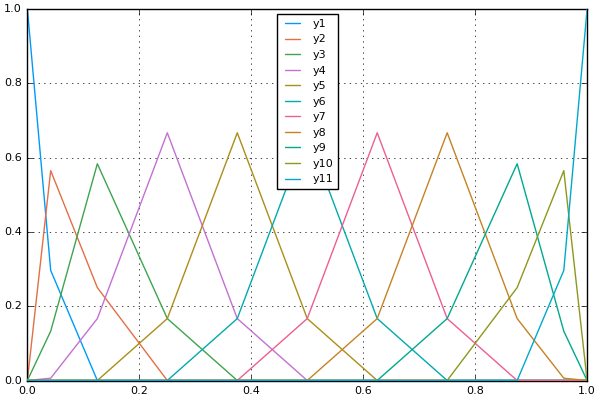

In [9]:
plot(S[1], ys)

以上がゼミ中にやった内容です。

問題点は、
* basis functionは9本にしたいのに11本できてしまった
* グラフがカクカクしている
という点でした

basis functionが多くなる問題ですが、

```
function nodes(p::SplineParams)
    breaks, evennum, k = p.breaks, p.evennum, p.k
    a = breaks[1]  # 20
    b = breaks[end]  # 21
    n = length(breaks) + k - 1  # 22
    x = cumsum(vcat(fill(a, k), breaks, fill(b, k)))  # 23
    x = (x[1+k:n+k] - x[1:n]) / k  # 24
    x[1] = a  # 25
    x[end] = b  # 26
    x
end
```
とあるので、"nodes"を使うと、最初に入力したbreak points（ここではlength(a)の9個）よりk-1(kはスプライン関数の次数）本だけ多くなるようです。
そのため、basis functionを9本にしたい場合は、最初のgridを7点にすればいいみたいです

グラフがカクカクする問題ですが、これは単純にyをS[1]という11点でしか評価していないためです。
そのため、funevalの3つ目の変数をもっと細かくとれば、解決します。

In [10]:
n = 11
ys1 = []

for i in 1:n
    c = zeros(n)
    c[i] = 1
    y = funeval(c, basis, linspace(0, 1, 100))
    push!(ys, y)
end

LoadError: LoadError: MethodError: no method matching funeval(::Array{Float64,1}, ::BasisMatrices.Basis{1,BasisMatrices.Spline,BasisMatrices.SplineParams}, ::LinSpace{Float64})
Closest candidates are:
  funeval(::Any, ::BasisMatrices.Basis{1,BF<:BasisMatrices.BasisFamily,BP<:BasisMatrices.BasisParams}, !Matched::Real) at C:\Users\eiki\.julia\v0.5\BasisMatrices\src\interp.jl:83
  funeval(::Any, ::BasisMatrices.Basis{1,BF<:BasisMatrices.BasisFamily,BP<:BasisMatrices.BasisParams}, !Matched::Real, !Matched::Any) at C:\Users\eiki\.julia\v0.5\BasisMatrices\src\interp.jl:83
  funeval{T<:Number}(::Any, ::BasisMatrices.Basis{1,BF<:BasisMatrices.BasisFamily,BP<:BasisMatrices.BasisParams}, !Matched::Array{T<:Number,1}) at C:\Users\eiki\.julia\v0.5\BasisMatrices\src\interp.jl:88
  ...
while loading In[10], in expression starting on line 4

funevalはLinSpaceには対応していないようです。LinSpaceをArrayに変えて試します

In [11]:
n = 11
ys1 = []

for i in 1:n
    c = zeros(n)
    c[i] = 1
    y = funeval(c, basis, collect(linspace(0, 1, 100)))
    push!(ys1, y)
end


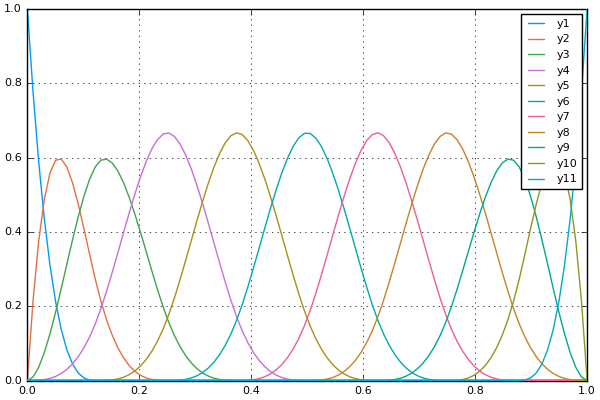

In [12]:
plot(collect(linspace(0, 1, 100)), ys1)

大体教科書通りの図がかけました

それでは、基底関数の数を変えて、教科書p.127のsplineの図を描きます

In [13]:
a2 = linspace(0, 1, 7)

7-element LinSpace{Float64}:
 0.0,0.166667,0.333333,0.5,0.666667,0.833333,1.0

In [14]:
basis2 = Basis(SplineParams(a2, 0, 3))

1 dimensional Basis on the hypercube formed by [0.0] × [1.0].
Basis families are BasisMatrices.Spline


In [19]:
n = 9
ys2 = []

for i in 1:n
    c = zeros(n)
    c[i] = 1
    y = funeval(c, basis2, collect(linspace(0, 1, 100)))
    push!(ys2, y)
end


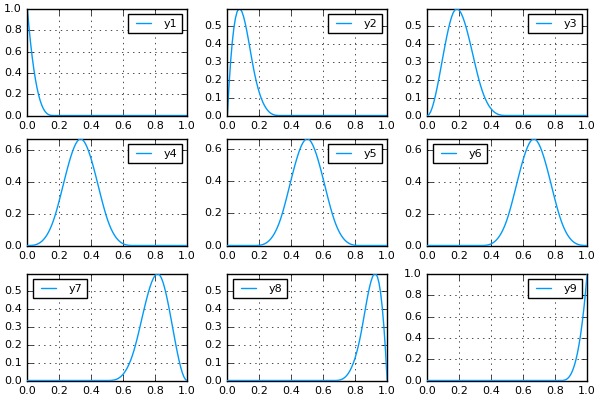

In [20]:
plot(layout=n, collect(linspace(0, 1, 100)), ys2)

次にlinear splineに移ります。SplineParamsの3つ目の変数がスプライン関数の次数なので、ここを1とします。

In [21]:
a3 = linspace(0, 1, 9)

9-element LinSpace{Float64}:
 0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0

In [22]:
basis3 = Basis(SplineParams(a3, 0, 1))

1 dimensional Basis on the hypercube formed by [0.0] × [1.0].
Basis families are BasisMatrices.Spline


In [24]:
n = 9
ys3 = []

for i in 1:n
    c = zeros(n)
    c[i] = 1
    y = funeval(c, basis3, collect(linspace(0, 1, 100)))
    push!(ys3, y)
end


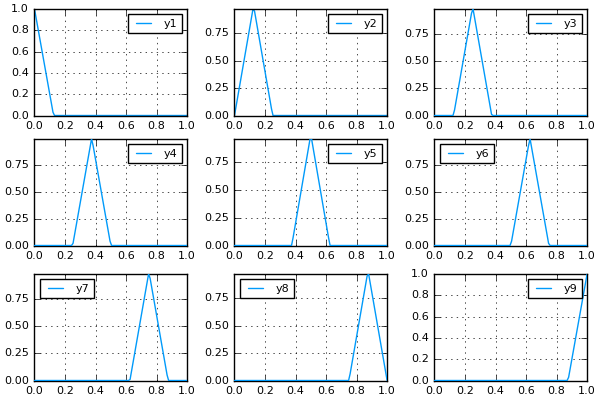

In [25]:
plot(layout=n, collect(linspace(0, 1, 100)), ys3)

次にChebychev polynomialのp.121に移ります。

In [26]:
basis4 = Basis(ChebParams(9, 0, 1))

1 dimensional Basis on the hypercube formed by [0.0] × [1.0].
Basis families are BasisMatrices.Cheb


In [27]:
n = 9
ys4 = []

for i in 1:n
    c = zeros(n)
    c[i] = 1
    y = funeval(c, basis4, collect(linspace(0, 1, 100)))
    push!(ys4, y)
end


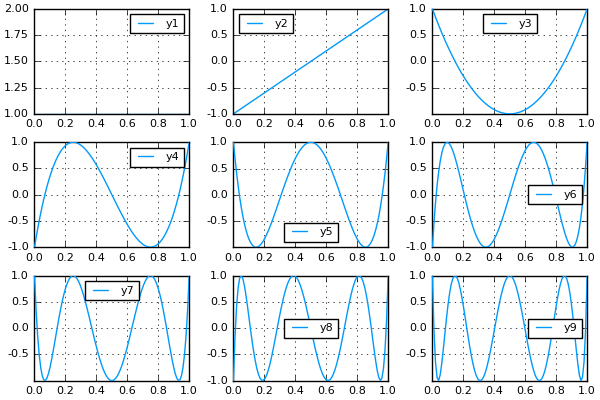

In [28]:
plot(layout=n, collect(linspace(0, 1, 100)), ys4)